In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print train_images.shape, train_labels

11501568/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) [5 0 4 ... 5 6 8]


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
print len(train_labels), train_images.shape[0]
a, b, c = train_images.shape
print a, b, c

60000 60000
60000 28 28


In [7]:
train_labels[0]

5

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

5


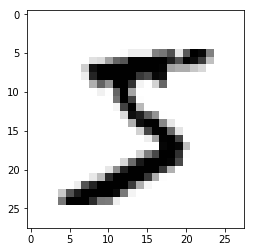

In [11]:
import matplotlib.pyplot as plt
digit = train_images[0]
print train_labels[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2600 - accuracy: 0.9249
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.1052 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0693 - accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0502 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0373 - accuracy: 0.9888


In [17]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/step


In [18]:
print('test_acc:', test_acc)

('test_acc:', 0.9787999987602234)
